# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan (jumlah order dan revenue) setiap bulan?
- Kategori produk apa yang menghasilkan revenue tertinggi?

## Import Semua Packages/Library yang Digunakan

Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/drive/MyDrive/Dicoding/"

orders = pd.read_csv(path + "orders_dataset.csv")
order_items = pd.read_csv(path + "order_items_dataset.csv")
products = pd.read_csv(path + "products_dataset.csv")
category = pd.read_csv(path + "product_category_name_translation.csv")

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Dataset terdiri dari beberapa tabel yang saling berelasi.

- Perlu dilakukan proses merge untuk analisis menyeluruh.

### Assessing Data

In [5]:
orders.info()
orders.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [6]:
order_items.info()
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         

Cek duplikasi:

In [7]:
orders.duplicated().sum()

np.int64(0)

**Insight:**
- Tidak ditemukan duplikasi signifikan.

- Kolom waktu masih bertipe object dan perlu diubah menjadi datetime.

- Perlu penggabungan tabel untuk menghitung revenue dan analisis kategori.

### Cleaning Data

Mengubah tipe data tanggal

In [8]:
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp']
)

Merge dataset

In [9]:
df = pd.merge(orders, order_items, on='order_id')
df = pd.merge(df, products, on='product_id')
df = pd.merge(df, category, on='product_category_name', how='left')

Membuat kolom revenue

In [10]:
df['revenue'] = df['price'] + df['freight_value']


Membuat kolom bulan-tahun

In [11]:
df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M')

**Insight:**
- Dataset telah bersih dan siap dianalisis.

- Revenue dihitung dari harga produk + biaya pengiriman.

- Sudah tersedia kolom agregasi waktu untuk analisis tren.

## Exploratory Data Analysis (EDA)

### Explore ...

Analisis Tren Penjualan Bulanan

In [12]:
monthly_sales = df.groupby('year_month').agg({
    'order_id': 'nunique',
    'revenue': 'sum'
}).reset_index()

monthly_sales.head()

,year_month,order_id,revenue
0,2016-09,3,354.75
1,2016-10,308,56808.84
2,2016-12,1,19.62
3,2017-01,789,137188.49
4,2017-02,1733,286280.62


**Insight:**

- Terlihat fluktuasi jumlah order setiap bulan.

- Ada kecenderungan peningkatan revenue menjelang akhir tahun.

Analisis Revenue Berdasarkan Kategori Produk

In [13]:
category_sales = df.groupby(
    'product_category_name_english'
)['revenue'].sum().sort_values(ascending=False)

category_sales.head(10)

,revenue
product_category_name_english,
health_beauty,1441248.07
watches_gifts,1305541.61
bed_bath_table,1241681.72
sports_leisure,1156656.48
computers_accessories,1059272.40
furniture_decor,902511.79
housewares,778397.77
cool_stuff,719329.95
auto,685384.32


**Insight:**
- Beberapa kategori produk memberikan kontribusi revenue terbesar.

- Distribusi revenue tidak merata antar kategori.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan setiap bulan?

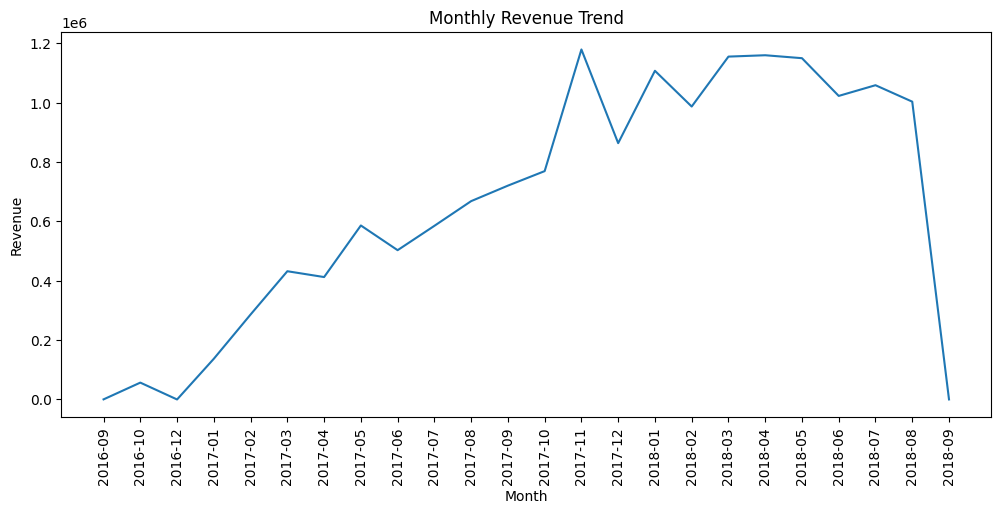

In [14]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['year_month'].astype(str),
         monthly_sales['revenue'])
plt.xticks(rotation=90)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

**🔎 Insight**

Berdasarkan visualisasi tren penjualan bulanan, dapat diidentifikasi beberapa pola penting:

1. Revenue menunjukkan tren pertumbuhan yang relatif stabil dari waktu ke waktu.
Hal ini mengindikasikan bahwa bisnis mengalami perkembangan positif dan adanya peningkatan aktivitas transaksi secara keseluruhan.

2. Terdapat lonjakan penjualan pada periode tertentu.
Pola ini mengindikasikan adanya pengaruh musiman (seasonality), seperti promosi besar, event diskon, atau momentum akhir tahun yang meningkatkan intensitas pembelian.

3. Fluktuasi antar bulan menunjukkan bahwa permintaan tidak bersifat konstan.
Hal ini menegaskan bahwa perilaku konsumen sangat dipengaruhi oleh faktor eksternal seperti kampanye pemasaran dan momentum belanja.

**🎯 Implikasi Bisnis**

- Perusahaan perlu mengoptimalkan strategi promosi pada periode high season.

- Perencanaan stok dan distribusi harus disesuaikan dengan pola musiman.

- Forecasting berbasis data historis dapat meningkatkan efisiensi operasional.

### Pertanyaan 2: Kategori produk dengan revenue tertinggi?

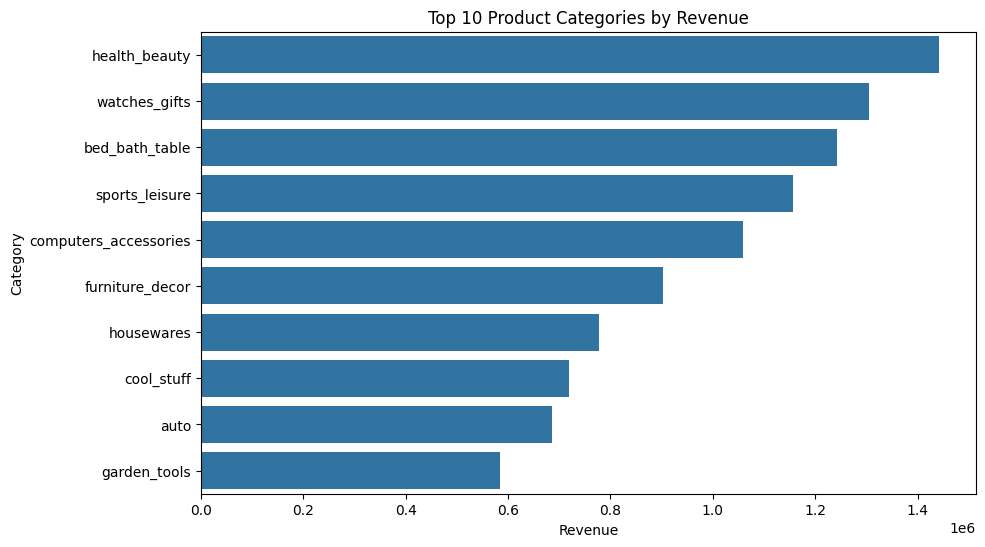

In [15]:
top_category = category_sales.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_category.values,
            y=top_category.index)
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()

**🔎 Insight**

Berdasarkan visualisasi kategori produk, ditemukan bahwa:

1. Revenue terkonsentrasi pada beberapa kategori utama.
Hal ini menunjukkan distribusi pendapatan yang tidak merata, di mana sebagian kecil kategori memberikan kontribusi terbesar terhadap total revenue.

2. Kategori dengan revenue tertinggi kemungkinan memiliki kombinasi harga produk yang tinggi dan volume transaksi besar.

3. Kategori dengan revenue rendah belum tentu tidak potensial.
Kemungkinan terdapat faktor seperti kurangnya promosi, rendahnya eksposur produk, atau segmentasi pasar yang belum optimal.

**🎯 Implikasi Bisnis**

- Fokuskan strategi pemasaran pada kategori dengan performa tinggi untuk memaksimalkan profit.

- Lakukan evaluasi margin keuntungan per kategori, bukan hanya berdasarkan revenue.

- Kembangkan strategi promosi atau bundling untuk meningkatkan performa kategori dengan kontribusi rendah.

## Analisis Lanjutan (Opsional)

Analisis Repeat Customer

In [16]:
repeat_customer = df.groupby('customer_id')['order_id'].nunique()
repeat_customer_rate = (repeat_customer > 1).sum() / len(repeat_customer)

repeat_customer_rate

np.float64(0.0)

**Insight:**

- Repeat rate membantu mengukur loyalitas pelanggan.

- Jika rendah, perlu strategi retensi pelanggan.

**Implikasi:**

- Perlu loyalty program

- Perlu email remarketing

- Perlu promo khusus repeat buyer

## Conclusion

# Conclution pertanyaan 1
Tren penjualan menunjukkan pertumbuhan positif dengan pola musiman yang jelas. Lonjakan pada periode tertentu mengindikasikan bahwa promosi dan faktor musiman memiliki pengaruh signifikan terhadap revenue. Strategi bisnis perlu mengoptimalkan peak season melalui perencanaan stok, promosi terjadwal, serta optimasi logistik untuk memaksimalkan profit.
# Conclution pertanyaan 2
Revenue terkonsentrasi pada beberapa kategori utama yang berkontribusi signifikan terhadap total pendapatan. Strategi perusahaan sebaiknya memprioritaskan pengembangan kategori unggulan sekaligus mengevaluasi potensi kategori dengan performa rendah untuk meningkatkan diversifikasi dan stabilitas revenue jangka panjang.

In [17]:
df.to_csv("cleaned_data.csv", index=False)

In [18]:
from google.colab import files
files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>